# Understanding Logistic Regression

This notebook aims at understanding how a Logistic Regression model is built using the Social Media Advertisement dataset. It focuses on Models with a categorical target and continuous features.

## 1- Importing libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import graphviz
#from IPython.display import Image, display
import pydotplus

In [33]:
import warnings
warnings.filterwarnings('ignore')

## 2- Loading the data

In [34]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 2- Data exploration

### Describe the dataset

In [35]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check if any null values in the data sets

In [36]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Check if any Duplicate values in the datasets

In [37]:
len(df[df.duplicated()])

0

- so there is *NO* `null values` and `duplicates` in given data sets

#### Multivariate Analysis

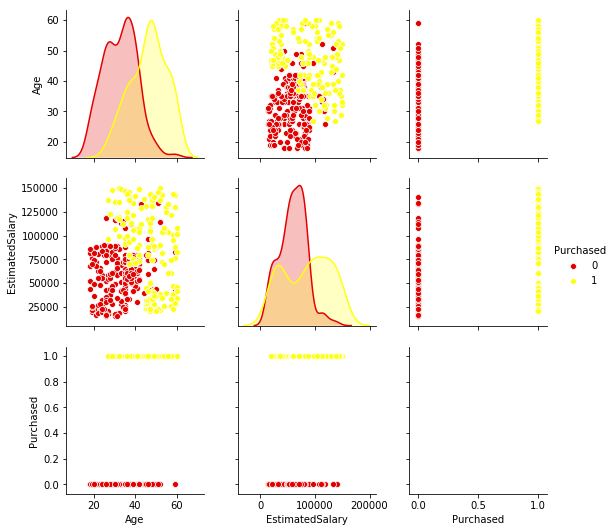

In [38]:
colors = ['red', 'yellow']
sns.pairplot(df.drop('User ID',axis=1), hue='Purchased', palette=sns.xkcd_palette(colors))
plt.show()

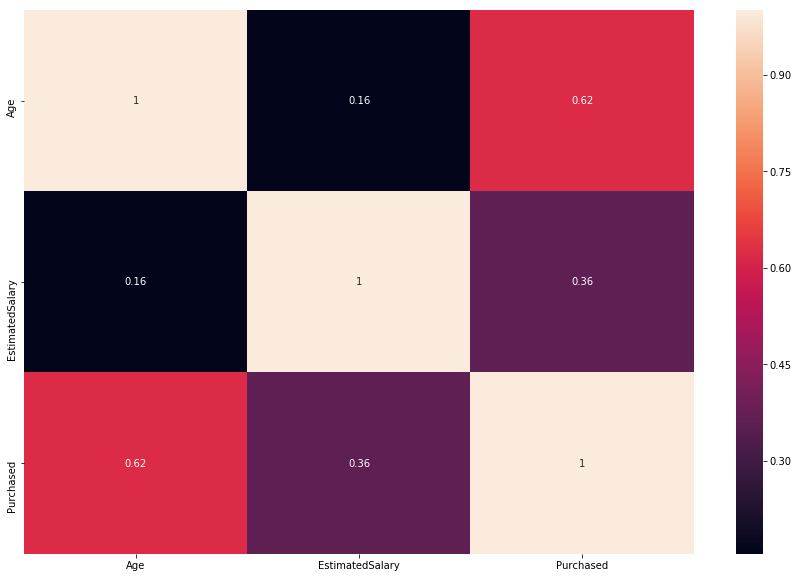

In [39]:
plt.figure(figsize=(15, 10))
corr = df.drop("User ID",axis=1).corr()
sns.heatmap(corr, annot=True)

plt.show()

## 3- Preparing the data

### Feature selection

In [40]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

- Since `User id` does not give any values, so we can drop this column

- `Gender` is a string datatype. So for simplicity in modelling, we'll drop it too

In [41]:
features = ['Age', 'EstimatedSalary']
X = df[features]
y = df['Purchased']


### Splitting into training and testing set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [43]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 4- Modeling

### Choosing a model

In [44]:
model = LogisticRegression()

### Training

In [45]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## 5- Evaluating the model

In [47]:
y_pred = model.predict(X_test)

### Accuracy

In [48]:
accuracy_score(y_test, y_pred)

0.89

The accuracy is not very good but it is not what interests us in this notebook. Btw, we only choose two variables. Let's see for which classes the model makes mistakes.

### Confusion matrix

In [17]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,65,3,68
1,8,24,32
All,73,27,100


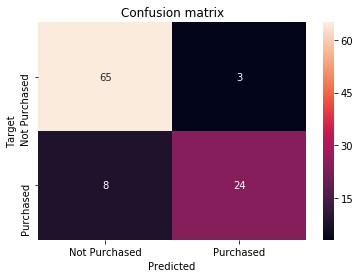

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased','Purchased'], 
            yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

We can see that the 11 targets were misclassified

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

